In [15]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload file
uploaded = files.upload()

# Load the uploaded file into a Pandas DataFrame
file_name = list(uploaded.keys())[0]  # Get the uploaded file name
df_latest = pd.read_csv(file_name)

Saving listings.csv to listings (1).csv


In [23]:
# Perform preprocessing: Handle missing values and remove outliers
df_preprocessed = df_latest.copy()

# Handling missing values
df_preprocessed["calendar_updated"] = df_preprocessed["calendar_updated"].fillna("Not Updated").astype(str)
df_preprocessed["has_availability"] = df_preprocessed["has_availability"].fillna("f").astype(str)

# Convert availability columns to integers
availability_cols = ["availability_30", "availability_60", "availability_90", "availability_365"]
for col in availability_cols:
    if col in df_preprocessed.columns:
        df_preprocessed[col] = df_preprocessed[col].fillna(0).astype(int)

# Convert number of reviews columns to integers
review_cols = ["number_of_reviews", "number_of_reviews_ltm"]
for col in review_cols:
    if col in df_preprocessed.columns:
        df_preprocessed[col] = df_preprocessed[col].fillna(0).astype(int)

# Removing outliers using IQR method for numerical columns
numerical_vars = [
    "minimum_nights", "maximum_nights", "maximum_maximum_nights",
    "availability_365", "number_of_reviews", "number_of_reviews_ltm"
]

for var in numerical_vars:
    if var in df_preprocessed.columns:
        Q1 = df_preprocessed[var].quantile(0.25)
        Q3 = df_preprocessed[var].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_preprocessed = df_preprocessed[(df_preprocessed[var] >= lower_bound) & (df_preprocessed[var] <= upper_bound)]

# Select only the processed variables for display
processed_columns = [
    "minimum_nights", "maximum_nights", "maximum_maximum_nights",
    "availability_30", "availability_60", "availability_90", "availability_365",
    "number_of_reviews", "number_of_reviews_ltm", "calendar_updated", "has_availability"
]

# Filter the dataset to include only the processed columns
df_processed = df_preprocessed[processed_columns]

# Display the clean data
display(df_processed)

minimum_nights  maximum_nights  maximum_maximum_nights  availability_30  \
3                  2             180                    1125                0   
4                  2             365                     365               15   
6                  2              89                      99               16   
10                 2              60                      60               18   
12                 2            1125                    1125                9   
...              ...             ...                     ...              ...   
7596               2              45                      45                2   
7602               2              14                      14                5   
7605               2            1125                    1125                2   
7607               2            1125                    1125               12   
7611               2             290                     290               20   

      availability_60  availability_90  availability_365  number_of_reviews  \
3                  25               55               330                  3   
4                  45               75               255                  1   
6                  42               72               162                  3   
10                 44               74               164                  0   
12                 39               69               279                  0   
...               ...              ...               ...                ...   
7596               22               50               316                  0   
7602               35               65               241                  6   
7605               25               36               126                  0   
7607               38               60               150                  6   
7611               38               58               236                 64   

      number_of_reviews_ltm calendar_updated has_availability  
3                         0      Not Updated                t  
4                         1      Not Updated                t  
6                         3      Not Updated                t  
10                        0      Not Updated                t  
12                        0      Not Updated                t  
...                     ...              ...              ...  
7596                      0      Not Updated                t  
7602                      6      Not Updated                t  
7605                      0      Not Updated                t  
7607                      6      Not Updated                t  
7611                     10      Not Updated                t  

[3892 rows x 11 columns]

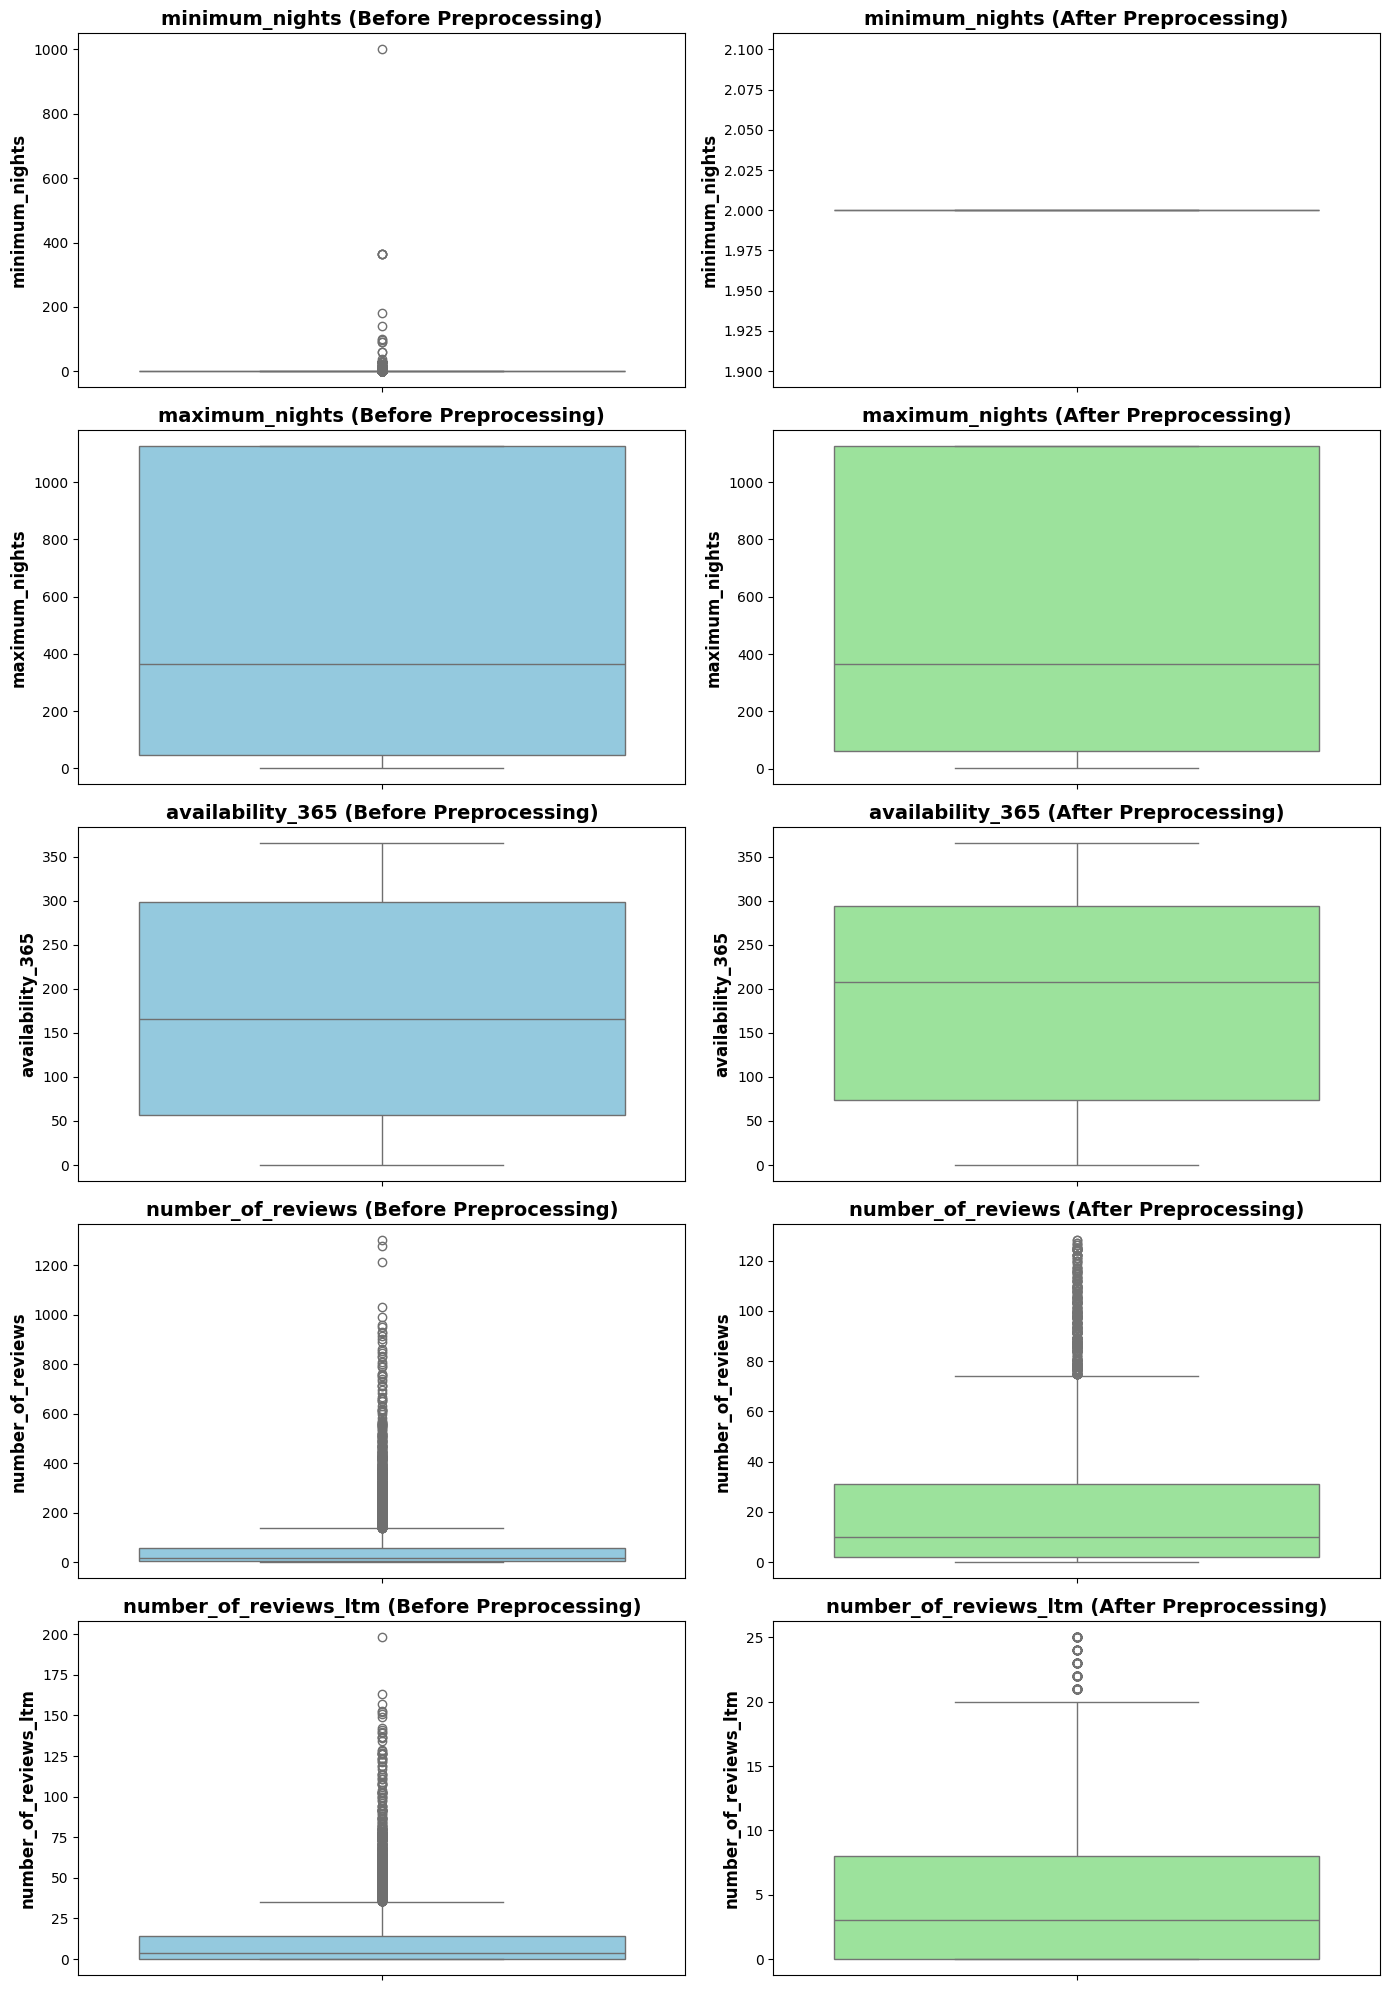

In [24]:
# Create subplots for side-by-side comparisons (boxplots)
fig, axes = plt.subplots(nrows=len(selected_vars), ncols=2, figsize=(14, len(selected_vars) * 4))

for i, var in enumerate(selected_vars):
    if var in df_latest.columns and var in df_preprocessed.columns:
        # Boxplot Before Preprocessing
        sns.boxplot(y=df_latest[var], color="skyblue", ax=axes[i, 0])
        axes[i, 0].set_title(f"{var} (Before Preprocessing)", fontsize=14, fontweight="bold")
        axes[i, 0].set_ylabel(var, fontsize=12, fontweight="bold")

        # Boxplot After Preprocessing
        sns.boxplot(y=df_preprocessed[var], color="lightgreen", ax=axes[i, 1])
        axes[i, 1].set_title(f"{var} (After Preprocessing)", fontsize=14, fontweight="bold")
        axes[i, 1].set_ylabel(var, fontsize=12, fontweight="bold")

# Adjust layout for better readability
plt.tight_layout()
plt.show()

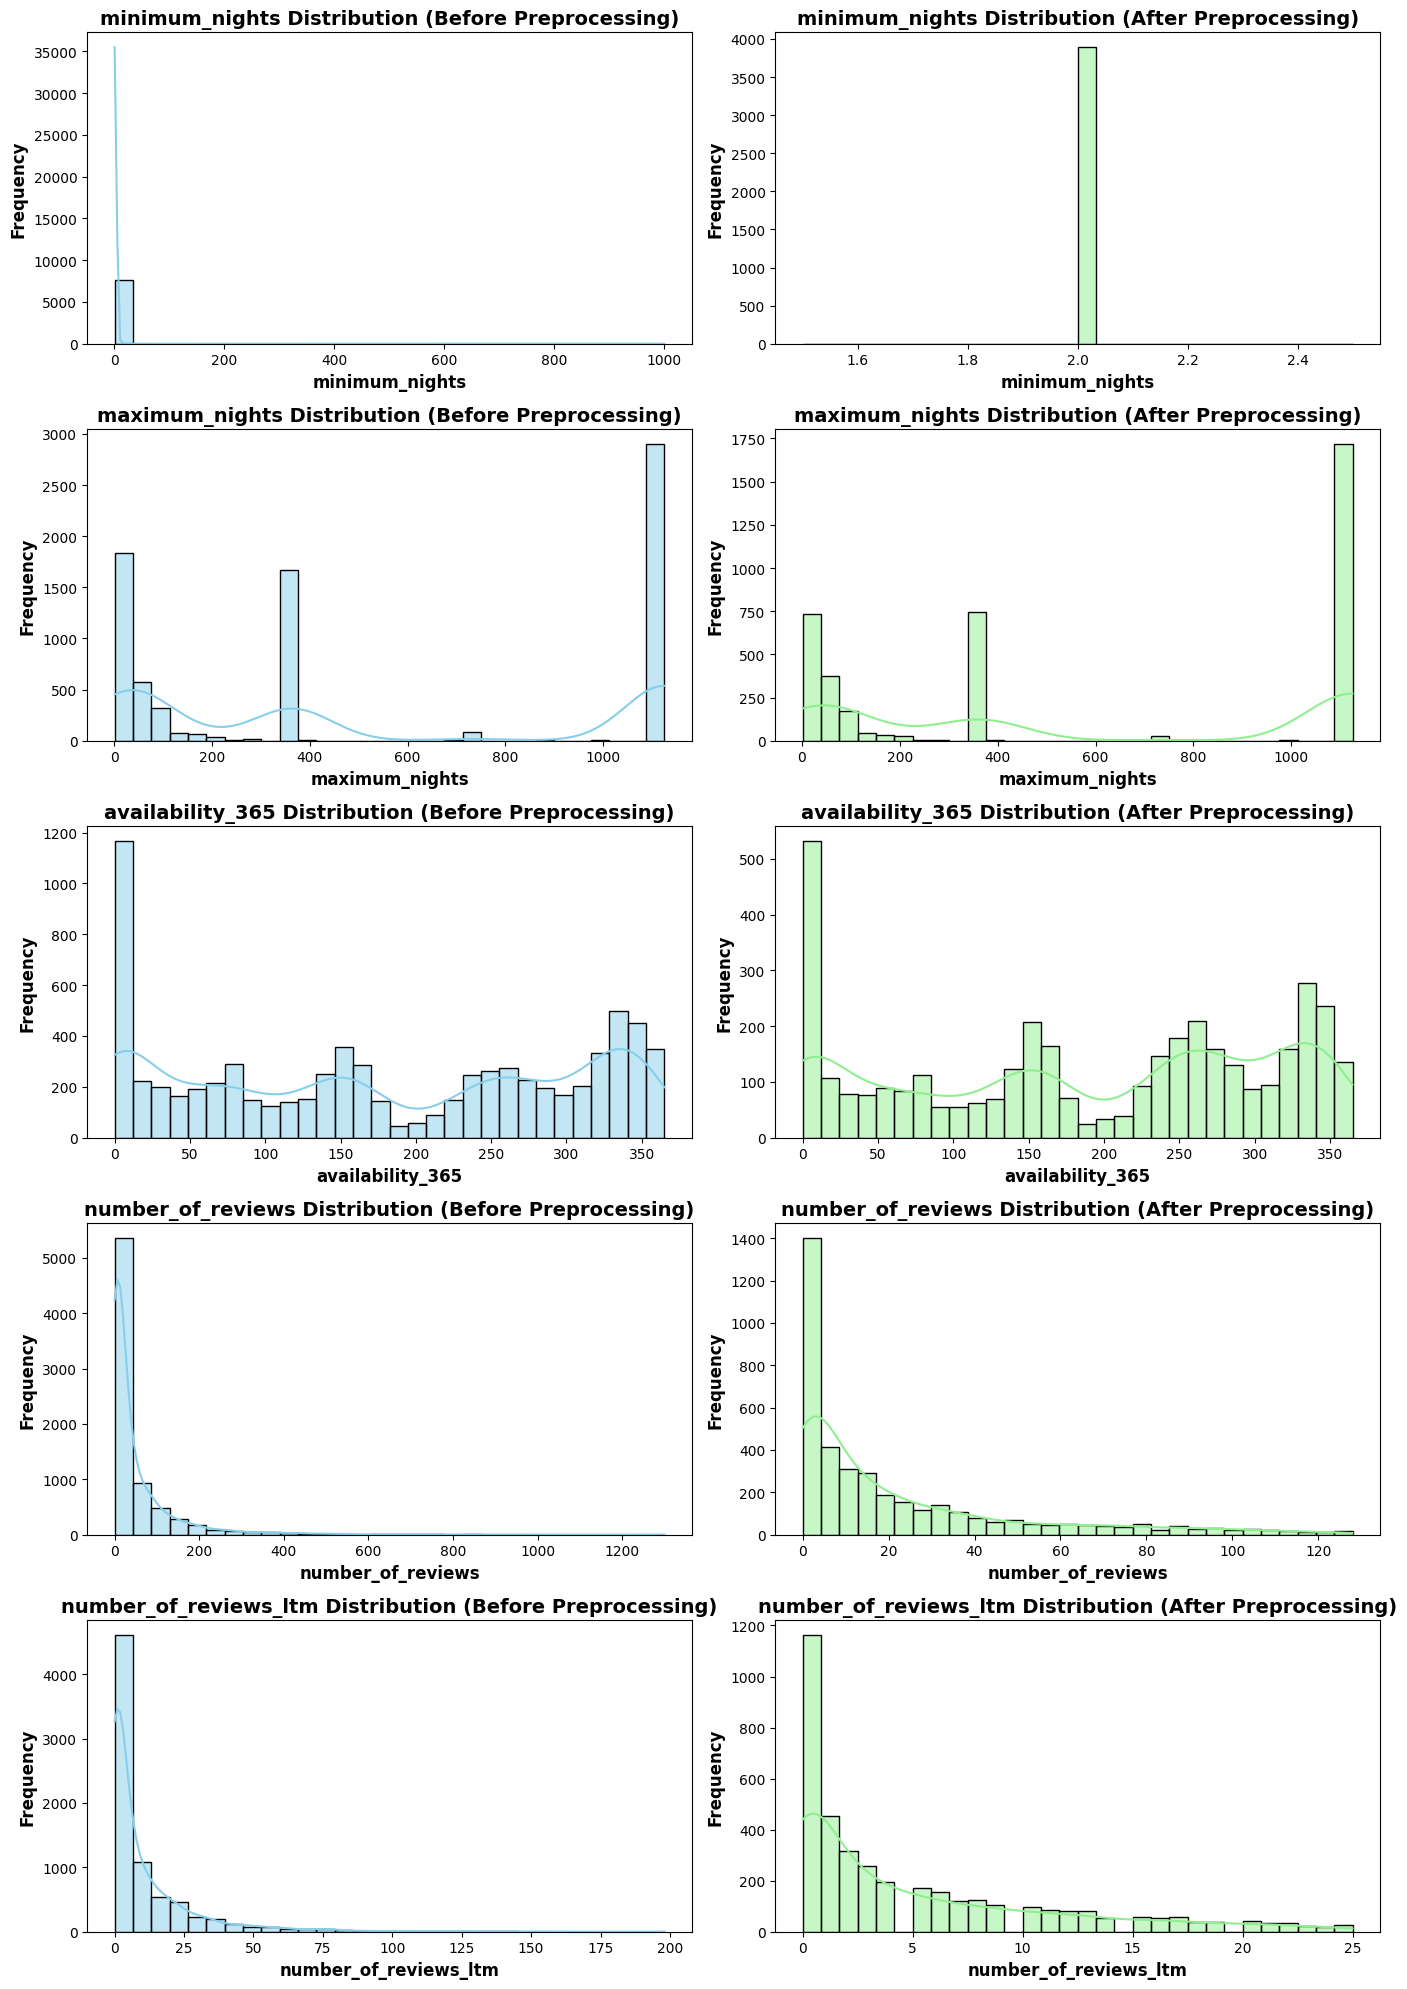

In [25]:
# Create subplots for histograms
fig, axes = plt.subplots(nrows=len(selected_vars), ncols=2, figsize=(14, len(selected_vars) * 4))

for i, var in enumerate(selected_vars):
    if var in df_latest.columns and var in df_preprocessed.columns:
        # Histogram Before Preprocessing
        sns.histplot(df_latest[var], bins=30, kde=True, color="skyblue", ax=axes[i, 0])
        axes[i, 0].set_title(f"{var} Distribution (Before Preprocessing)", fontsize=14, fontweight="bold")
        axes[i, 0].set_xlabel(var, fontsize=12, fontweight="bold")
        axes[i, 0].set_ylabel("Frequency", fontsize=12, fontweight="bold")

        # Histogram After Preprocessing
        sns.histplot(df_preprocessed[var], bins=30, kde=True, color="lightgreen", ax=axes[i, 1])
        axes[i, 1].set_title(f"{var} Distribution (After Preprocessing)", fontsize=14, fontweight="bold")
        axes[i, 1].set_xlabel(var, fontsize=12, fontweight="bold")
        axes[i, 1].set_ylabel("Frequency", fontsize=12, fontweight="bold")

# Adjust layout
plt.tight_layout()
plt.show()

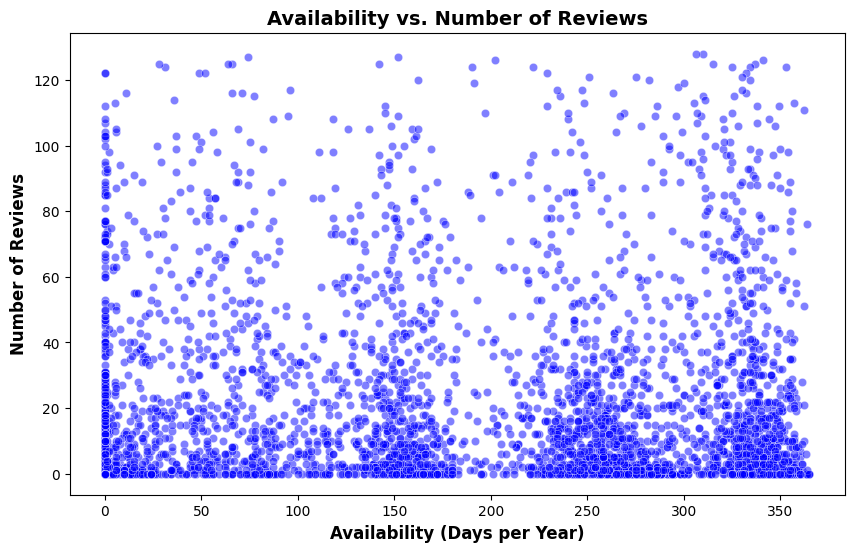

In [26]:
# Scatter plot for 'availability_365' vs. 'number_of_reviews'
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=df_preprocessed["availability_365"], y=df_preprocessed["number_of_reviews"], color="blue", alpha=0.5, ax=ax)
ax.set_title("Availability vs. Number of Reviews", fontsize=14, fontweight="bold")
ax.set_xlabel("Availability (Days per Year)", fontsize=12, fontweight="bold")
ax.set_ylabel("Number of Reviews", fontsize=12, fontweight="bold")
plt.show()

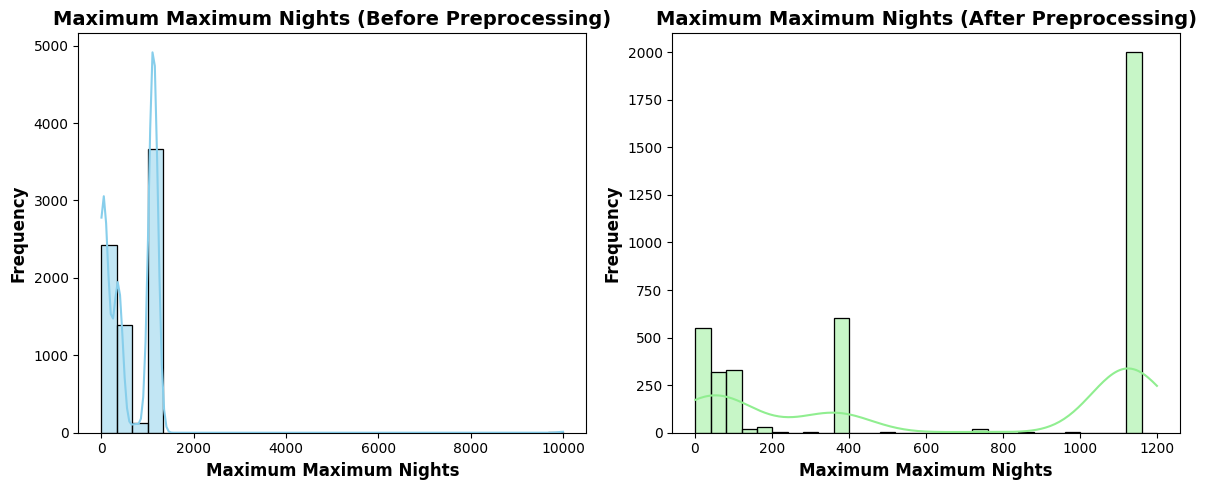

In [27]:
# Generate histograms for 'maximum_maximum_nights' before and after preprocessing
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.histplot(df_latest["maximum_maximum_nights"], bins=30, kde=True, color="skyblue", ax=axes[0])
axes[0].set_title("Maximum Maximum Nights (Before Preprocessing)", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Maximum Maximum Nights", fontsize=12, fontweight="bold")
axes[0].set_ylabel("Frequency", fontsize=12, fontweight="bold")

sns.histplot(df_preprocessed["maximum_maximum_nights"], bins=30, kde=True, color="lightgreen", ax=axes[1])
axes[1].set_title("Maximum Maximum Nights (After Preprocessing)", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Maximum Maximum Nights", fontsize=12, fontweight="bold")
axes[1].set_ylabel("Frequency", fontsize=12, fontweight="bold")

plt.tight_layout()
plt.show()

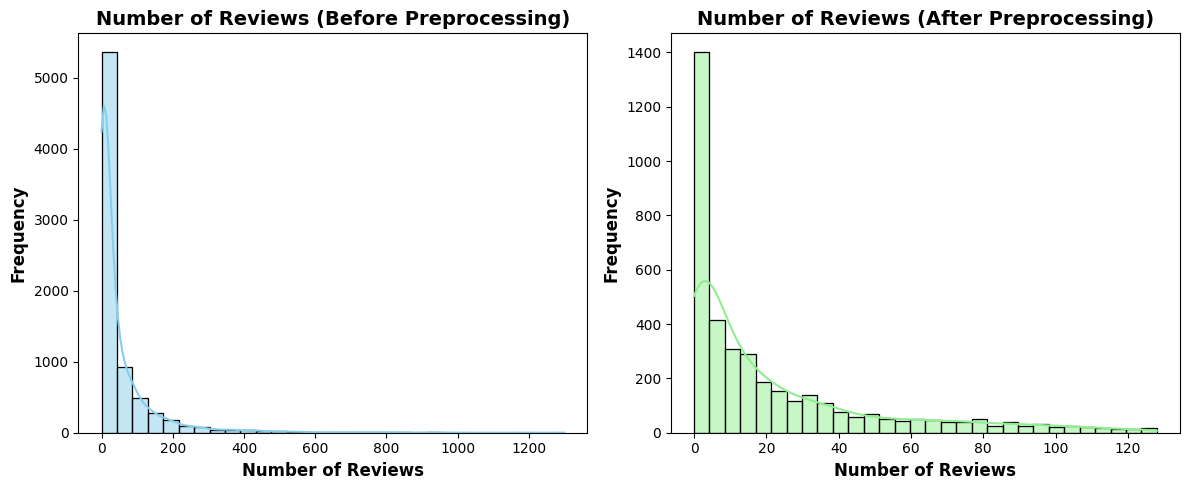

In [28]:
# Generate histograms for 'number_of_reviews' before and after preprocessing
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.histplot(df_latest["number_of_reviews"], bins=30, kde=True, color="skyblue", ax=axes[0])
axes[0].set_title("Number of Reviews (Before Preprocessing)", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Number of Reviews", fontsize=12, fontweight="bold")
axes[0].set_ylabel("Frequency", fontsize=12, fontweight="bold")

sns.histplot(df_preprocessed["number_of_reviews"], bins=30, kde=True, color="lightgreen", ax=axes[1])
axes[1].set_title("Number of Reviews (After Preprocessing)", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Number of Reviews", fontsize=12, fontweight="bold")
axes[1].set_ylabel("Frequency", fontsize=12, fontweight="bold")

plt.tight_layout()
plt.show()